<a href="https://colab.research.google.com/github/yjliu212/hello-world/blob/master/Inversion_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/My\ Drive/Colab\ Notebooks
#!ls  # To list files and verify the location


/content/drive/My Drive/Colab Notebooks


Inverted Velocities (m/s): [ 507.31996076  477.13225841  285.52782072 2019.9462211  3353.60621806]


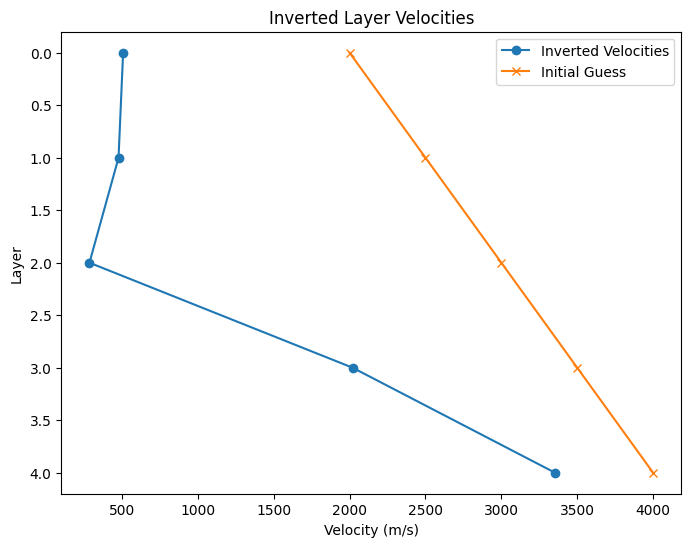

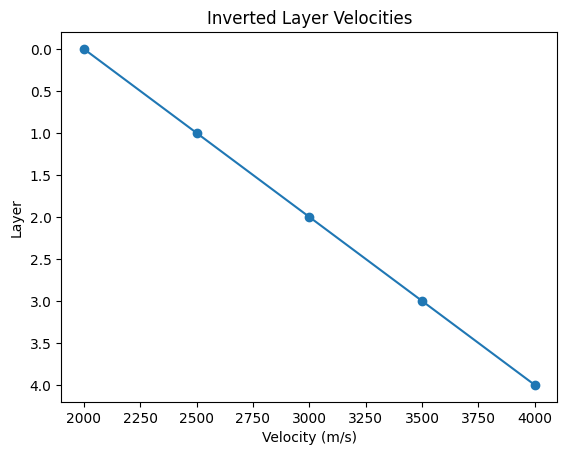

In [7]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# 假设的测量数据（单位：秒）
travel_times = np.array([0.2, 0.4, 0.6, 0.8, 1.0])

# 每层厚度（单位：米）
layer_thickness = 100

# 反演模型函数
def travel_time_model(velocities, layer_thickness):
    return layer_thickness / velocities

# 目标函数：计算测量数据与模型预测数据的差异
def objective_function(velocities, travel_times, layer_thickness):
    predicted_times = np.cumsum(travel_time_model(velocities, layer_thickness))
    return np.sum((travel_times - predicted_times)**2)

# 初始猜测的声速（单位：米/秒）
initial_guess = np.array([2000, 2500, 3000, 3500, 4000])

# 使用最小化方法反演声速
result = opt.minimize(objective_function, initial_guess, args=(travel_times, layer_thickness))

# 反演得到的声速
inverted_velocities = result.x

# 打印结果
print("Inverted Velocities (m/s):", inverted_velocities)

# 绘制反演结果
plt.figure(figsize=(8, 6))
plt.plot(inverted_velocities, range(len(inverted_velocities)), marker='o',label='Inverted Velocities')
plt.plot(initial_guess, range(len(initial_guess)), marker='x',label='Initial Guess')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Layer")
plt.title("Inverted Layer Velocities")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

plt.plot(initial_guess, range(len(inverted_velocities)), marker='o')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Layer")
plt.title("Inverted Layer Velocities")
plt.gca().invert_yaxis()
plt.show()
